<a href="https://colab.research.google.com/github/mcortarod/damavisdschallenge2022/blob/main/Damavis_Data_Scientist_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Manuel Cortacero Rodríguez

Damavis Data Scientist Challenge 2022

26/09/2022

# Problem 1: Programming

Consider a box with three balls, each with a different value: ball A is worth 2 points, ball B is worth 3 points and ball C is worth 4 points. Write a function that calculates the number of different ways of reaching a total sum of N points by extracting from the box one ball at a time, taking into account the order in which the balls are drawn.

For example, for N=6 you have 4 different possibilities:


*   Taking ball B twice in a row → 3 + 3 = 6 points
*   Taking ball A three times in a row → 2 + 2 + 2 = 6 points
* Taking ball A, then ball C → 2 + 4 = 6 points
* Taking ball C, then ball A → 4 + 2 = 6 points

Your function must receive the target number of points N as a parameter and return the number of different ways of getting to that number. Make the function as efficient as possible and discuss its computational complexity.

Before getting started, I will define a helper function that will be useful for the function requested.

In [64]:
def zeros(list):
    """
    Function that gets as a parameter a list, and returns an integer,
    corresponding with the number of elements equal to zero in the list
    - Inputs:
        list: list of elements
    - Outputs:
        zero: number of zeros in list
    """

    zero = 0
    for i in list:
        if i == 0:
            zero += 1
    return zero

Now, we define the requested function, which is called ``` diff_ways```. The logic behind the algorithm is the following:

When given a number N, we check which are the maximum number of times that N can be divided (integer division) by 2, 3 and 4 (balls values), and we keep those numbers on a new list, `max_options`. After that, with the help of 3 for loops, we check the different possibilities for 2, 3 and 4 to be combined to get the number N.



In [65]:
def diff_ways(N):
    """
    Function that receives an integer number, and return how many
    options exist for three numbers to combine to get the number N
    - Inputs:
        N: integer number (and positive)
    - Outputs:
        counter: number of possible combinations of the three given numbers
        to sum N
    """

    # Values of the balls are saved on a list
    balls = [2,3,4]
    
    # Maximum number of times that N can be divided by the numbers on the
    # list balls are saved on another list
    max_options = []
    for i in balls:
        max_options.append(N//i)
    
    counter = 0
    
    # Triple for loop to check all the possible combinations
    # Depending on the number of zeros in the list [i,j,k], there will be 
    # a different number of possible combinations
    for i in range(max_options[0]+1):
        for j in range(max_options[1]+1):
            for k in range(max_options[2]+1):
                if (i*balls[0]+j*balls[1]+k*balls[2]) == N:
                    if zeros([i,j,k]) == 2:
                        counter += 1
                    elif zeros ([i,j,k]) == 1:
                        if i == 1 or j == 1 or k == 1:
                            counter += i+j+k
                        else:
                            counter += 3*max([i,j,k])
                    else:
                        counter += 6*max([i,j,k])
    
    return counter

As there are three nested for loops, and conditionals doing O(1) complexity operations, the total complexity of the algorithm would be O(n^3).

This function work for low values of N (up to 15), but for higher numbers, some permutations aren't counted as it should be (I've managed to get the total number of permutations for lower numbers, depending on the number of zeros in the tuple (i,j,k), but not a general expression for higher numbers). 

I haven't been able to reduce the algorithm complexity either.

# Problem 2: Demand Estimation

The sales of two companies, Company 1 and Company 2, in two regions, Region 1 and Region 2, are provided here. The description of the only three columns are:


*   Sales_U → Sales in equivalent units (lbs)
*   Sales_USD → Sales in $
*   date → starting date for the week


## Task 1

Construct time-series plots of sales and prices for Company 1 in Region 1 and 2. Repeat the exercise for Company 2. Describe the differences or similarities between Company 1 and 2 pricing policies.

Before getting started with the first task, it is convenient to check the dataset in order to know if they need any pre-processing. Besides, the libraries that will be used during this problem, will be imported here too.

The nomenclature used for each CSV turned to a dataframe will be:
* df11: Company 1, Region 1
* df12: Company 1, Region 2
* df21: Company 2, Region 1
* df22: Company 2, Region 2




In [66]:
# Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing CSVs
df11 = pd.read_csv('region1_company1.csv')
df12 = pd.read_csv('region1_company2.csv')
df21 = pd.read_csv('region2_company1.csv')
df22 = pd.read_csv('region2_company2.csv')

After seeing the content of the files, we can see that the elements of the column containing the date are strings. We can use the library `datetime` in order to change the datatype to other that suits better for our purpouse.

We can add a new column too, `Mean_price_USD`, containing the average price of every sale in a given date. `0` values will also be changed for the average value of the corresponding column.


In [67]:
import datetime as dt

# We eliminate first the ".1" element at the end of every string
df11['Date'] = df11['Date'].str[0:7]
df12['Date'] = df12['Date'].str[0:7]
df21['Date'] = df21['Date'].str[0:7]
df22['Date'] = df22['Date'].str[0:7]

# We convert the strings into datetime objects
df11['Date'] = pd.to_datetime(df11['Date'], format='%b%d%y')
df12['Date'] = pd.to_datetime(df12['Date'], format='%b%d%y')
df21['Date'] = pd.to_datetime(df21['Date'], format='%b%d%y')
df22['Date'] = pd.to_datetime(df22['Date'], format='%b%d%y')

# Reemplacing the 0 values of the dataset with the mean value of the column
df21['Sales_U'].replace(to_replace = 0, value = df21['Sales_U'].mean(), inplace=True)
df21['Sales_USD'].replace(to_replace = 0, value = df21['Sales_USD'].mean(), inplace=True)
df22['Sales_U'].replace(to_replace = 0, value = df22['Sales_U'].mean(), inplace=True)
df22['Sales_USD'].replace(to_replace = 0, value = df22['Sales_USD'].mean(), inplace=True)

# We add a column including the mean price of every sale
df11['Mean_price_USD'] = df11['Sales_USD']/df11['Sales_U']
df12['Mean_price_USD'] = df12['Sales_USD']/df12['Sales_U']
df21['Mean_price_USD'] = df21['Sales_USD']/df21['Sales_U']
df22['Mean_price_USD'] = df22['Sales_USD']/df22['Sales_U']

Now, we can proceed with the main task. The time-series plot requested are the following:

- - - - - - - - - - C O M P A N Y 1 - - - - - - - - - - 



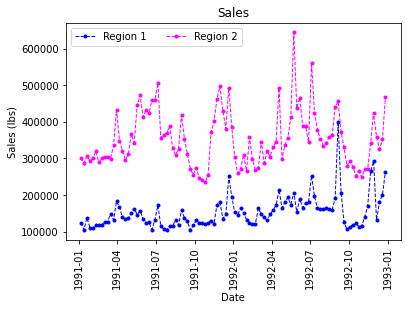

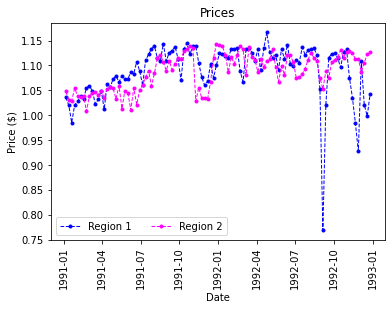

In [68]:
# --- COMPANY 1 ---
print(10*'- ' + 'C O M P A N Y 1 ' + 10*'- ')
print()

# Region 1 - Sales
plt.title("Sales")
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Sales (lbs)")
plt.plot_date(df11['Date'], df11['Sales_U'], c = "blue", ls = "--", lw = 1, marker = '.')
plt.plot_date(df12['Date'], df12['Sales_U'], c = "magenta", ls = "--", lw = 1, marker = '.')
plt.legend(['Region 1', 'Region 2'], ncol=2)
plt.show()

# Region 1 - Prices
plt.title("Prices")
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Price ($)")
plt.plot_date(df11['Date'], df11['Mean_price_USD'], c = "blue", ls = "--", lw = 1, marker = '.')
plt.plot_date(df12['Date'], df12['Mean_price_USD'], c = "magenta", ls = "--", lw = 1, marker = '.')
plt.legend(['Region 1', 'Region 2'], ncol=2)
plt.show()

- - - - - - - - - - C O M P A N Y 2 - - - - - - - - - - 



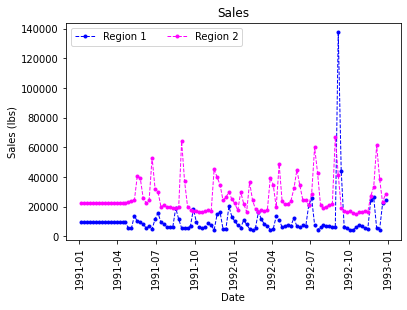

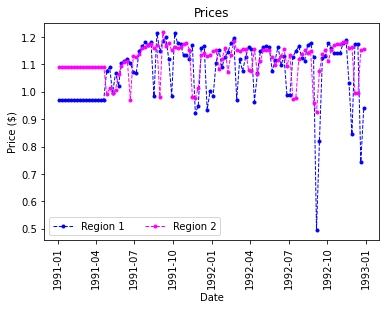

In [69]:
# --- COMPANY 2 ---
print(10*'- ' + 'C O M P A N Y 2 ' + 10*'- ')
print()

# Region 1 - Sales
plt.title("Sales")
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Sales (lbs)")
plt.plot_date(df21['Date'], df21['Sales_U'], c = "blue", ls = "--", lw = 1, marker = '.')
plt.plot_date(df22['Date'], df22['Sales_U'], c = "magenta", ls = "--", lw = 1, marker = '.')
plt.legend(['Region 1', 'Region 2'], ncol=2)
plt.show()

# Region 1 - Prices
plt.title("Prices")
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Price ($)")
plt.plot_date(df21['Date'], df21['Mean_price_USD'], c = "blue", ls = "--", lw = 1, marker = '.')
plt.plot_date(df22['Date'], df22['Mean_price_USD'], c = "magenta", ls = "--", lw = 1, marker = '.')
plt.legend(['Region 1', 'Region 2'], ncol=2)
plt.show()

In view of the results, Company 1 graphics show that, despite of the fact that sales in Region 2 are higher than in Region 1, the prices in every region are very similar. In the case of Company 2, prices are similar in both regions too, but so is the number of units.

Regarding the sales, both companies have higher numbers in Region 2. However, Company 1 has, approximately, 10 times more sales than Company 2. Prices are similar for both companies in the time-interval studied.

## Task 2

Construct scatter-plots of sales versus prices for Company 1 in Region 1 and Region 2 separately. Repeat the exercise for Company 2. Is there evidence for a negatively sloped demand-curve in the data? Eye-balling these plots, does demand appear more elastic in Region 1 or 2?

Previous note: in order to do a better observation of the demand-curve, the axis in every graphic representation will be the same for the four plots.

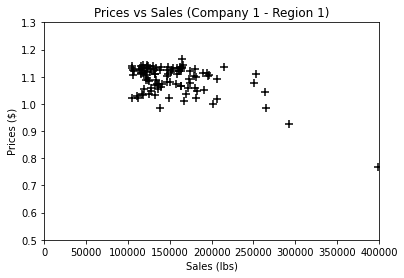

In [70]:
# --- COMPANY 1, REGION 1 ---
plt.title("Prices vs Sales (Company 1 - Region 1)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($)")
plt.scatter(x = df11['Sales_U'], y = df11['Mean_price_USD'], c = "black", marker = "+", s = 50, linewidths = 2)
plt.axis([0, 400000, 0.5, 1.3])
plt.show()

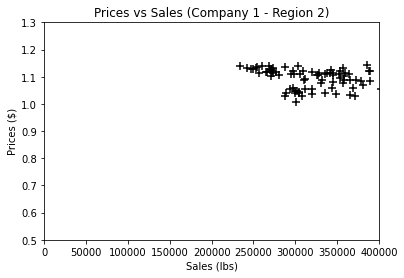

In [71]:
# --- COMPANY 1, REGION 2 ---
plt.title("Prices vs Sales (Company 1 - Region 2)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($)")
plt.scatter(x = df12['Sales_U'], y = df12['Mean_price_USD'], c = "black", marker = "+", s = 50, linewidths = 2)
plt.axis([0, 400000, 0.5, 1.3])
plt.show()

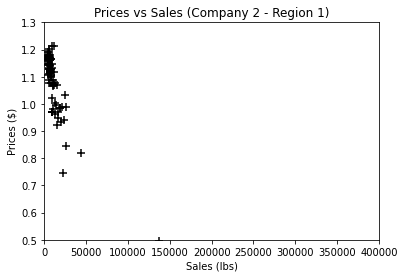

In [72]:
# --- COMPANY 2, REGION 1 ---
plt.title("Prices vs Sales (Company 2 - Region 1)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($)")
plt.scatter(x = df21['Sales_U'], y = df21['Mean_price_USD'], c = "black", marker = "+", s = 50, linewidths = 2)
plt.axis([0, 400000, 0.5, 1.3])
plt.show()

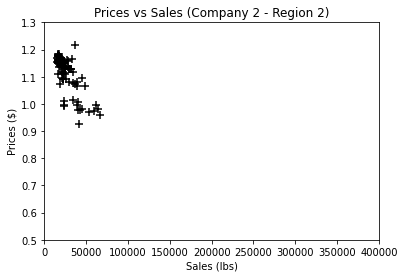

In [73]:
# --- COMPANY 2, REGION 2 ---
plt.title("Prices vs Sales (Company 2 - Region 2)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($)")
plt.scatter(x = df22['Sales_U'], y = df22['Mean_price_USD'], c = "black", marker = "+", s = 50, linewidths = 2)
plt.axis([0, 400000, 0.5, 1.3])
plt.show()

As it can be seen in the previous graphics, there is a negatively sloped demand-curve for the four cases. However, for Company 2, the negative slope is steeper.

Regarding the elasticity of every region, it is hard to tell only seeing the plots for Company 1 with a naked eye. However, for Company 2, Region 2 seems to be more elastic than Region 1.

## Task 3

Estimate the price elasticity of demand for Company 1 and 2 at Region 1 and 2 (four different demand models). Is the demand elasticity higher (in absolute magnitude) in Region 1 or 2?

Before getting started with out models, it is convenient to rescale the data, in order to avoid sales to have a higher weight on the model than prices.

In [74]:
# Data rescaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# The rescaling will be done before each model

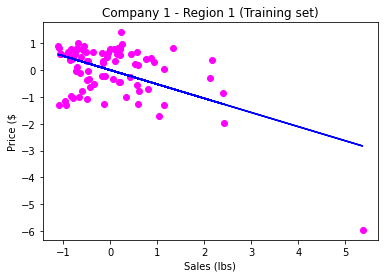

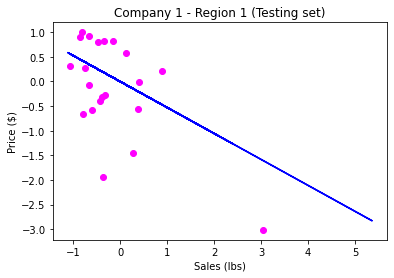

In [75]:
# --- COMPANY 1, REGION 1 ---

# We select both independent (x) and dependent (y) variables
x = df11.iloc[:, :1].values
y = df11.iloc[:, 3:4].values

# We divide our dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Rescaling of train and test sets
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# We prepare the regression model
from sklearn.linear_model import LinearRegression

regression11 = LinearRegression()
regression11.fit(x_train, y_train)

y_pred = regression11.predict(x_test)

# Training set plot
plt.scatter(x_train, y_train, color = "magenta")
plt.plot(x_train, regression11.predict(x_train), color = "blue")
plt.title("Company 1 - Region 1 (Training set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Price ($")
plt.show()

# Testing set plot
plt.scatter(x_test, y_test, color = "magenta")
plt.plot(x_train, regression11.predict(x_train), color = "blue")
plt.title("Company 1 - Region 1 (Testing set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Price ($)")
plt.show()

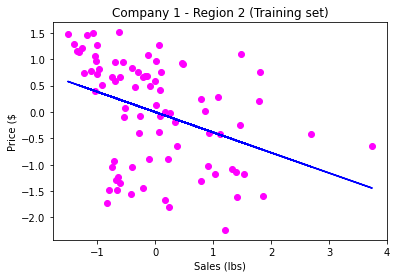

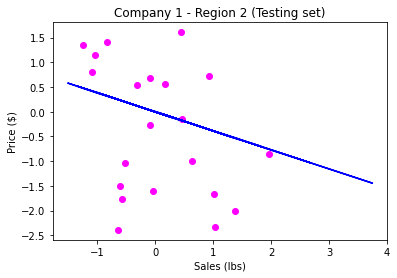

In [76]:
# --- COMPANY 1, REGION 2 ---

# We select both independent (x) and dependent (y) variables
x = df12.iloc[:, :1].values
y = df12.iloc[:, 3:4].values

# We divide our dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Rescaling of train and test sets
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# We prepare the regression model
from sklearn.linear_model import LinearRegression

regression12 = LinearRegression()
regression12.fit(x_train, y_train)

y_pred = regression12.predict(x_test)

# Training set plot
plt.scatter(x_train, y_train, color = "magenta")
plt.plot(x_train, regression12.predict(x_train), color = "blue")
plt.title("Company 1 - Region 2 (Training set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Price ($")
plt.show()

# Testing set plot
plt.scatter(x_test, y_test, color = "magenta")
plt.plot(x_train, regression12.predict(x_train), color = "blue")
plt.title("Company 1 - Region 2 (Testing set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Price ($)")
plt.show()

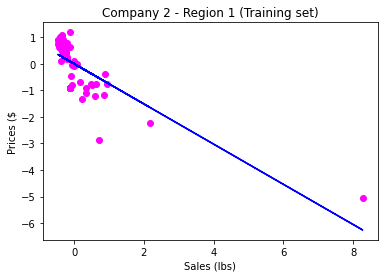

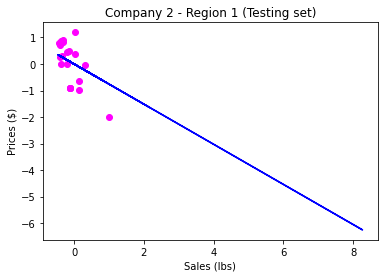

In [77]:
# --- COMPANY 2, REGION 1 ---

# We select both independent (x) and dependent (y) variables
x = df21.iloc[:, :1].values
y = df21.iloc[:, 3:4].values

# We divide our dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Rescaling of train and test sets
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# We prepare the regression model
from sklearn.linear_model import LinearRegression

regression21 = LinearRegression()
regression21.fit(x_train, y_train)

y_pred = regression21.predict(x_test)

# Training set plot
plt.scatter(x_train, y_train, color = "magenta")
plt.plot(x_train, regression21.predict(x_train), color = "blue")
plt.title("Company 2 - Region 1 (Training set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($")
plt.show()

# Testing set plot
plt.scatter(x_test, y_test, color = "magenta")
plt.plot(x_train, regression21.predict(x_train), color = "blue")
plt.title("Company 2 - Region 1 (Testing set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($)")
plt.show()

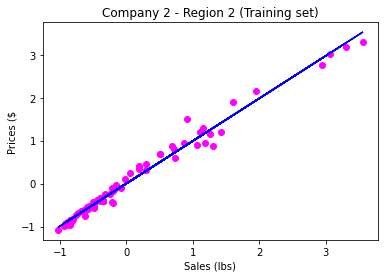

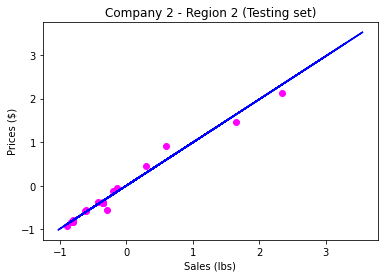

In [78]:
# --- COMPANY 2, REGION 2 ---

# We select both independent (x) and dependent (y) variables
x = df22.iloc[:, :1].values
y = df22.iloc[:, 1:2].values

# We divide our dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Rescaling of train and test sets
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# We prepare the regression model
from sklearn.linear_model import LinearRegression

regression22 = LinearRegression()
regression22.fit(x_train, y_train)

y_pred = regression22.predict(x_test)

# Training set plot
plt.scatter(x_train, y_train, color = "magenta")
plt.plot(x_train, regression22.predict(x_train), color = "blue")
plt.title("Company 2 - Region 2 (Training set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($")
plt.show()

# Testing set plot
plt.scatter(x_test, y_test, color = "magenta")
plt.plot(x_train, regression22.predict(x_train), color = "blue")
plt.title("Company 2 - Region 2 (Testing set)")
plt.xlabel("Sales (lbs)")
plt.ylabel("Prices ($)")
plt.show()

In [79]:
# Estimations for the price elasticity of demand for every company and every region
print('- The value for the price elasticity of demand in Company {} and region {} is: {}'.format(1, 1, regression11.coef_))
print('- The value for the price elasticity of demand in Company {} and region {} is: {}'.format(1, 2, regression12.coef_))
print('- The value for the price elasticity of demand in Company {} and region {} is: {}'.format(2, 1, regression21.coef_))
print('- The value for the price elasticity of demand in Company {} and region {} is: {}'.format(2, 2, regression22.coef_))

- The value for the price elasticity of demand in Company 1 and region 1 is: [[-0.52711609]]
- The value for the price elasticity of demand in Company 1 and region 2 is: [[-0.3854252]]
- The value for the price elasticity of demand in Company 2 and region 1 is: [[-0.75656336]]
- The value for the price elasticity of demand in Company 2 and region 2 is: [[0.99104283]]


As it can be seen from the results shown above, in absolute magnitude, the demand elasticity is higher for Company 2 in Region 2. It is followed by the values in Region 1 (for both Company 1 and 2). The lower value is the one corresponding to Company 1 in Region 2.

## Task 4

Compute the % change in unit sales for a 10% increase in the price of Company 1 at Region 1.

To calculate the % change in unit sales for a 10% increase in the price of Company 1 at Region 1, we can apply the general formula for the price elasticity of demand, PED, given by:

$$PED=\frac{\Delta Q}{\Delta P}$$ 

Where $$\Delta Q$$ is the % change in sales, and $$\Delta P$$ is the % change in price.

In [80]:
# 10% change in the price
delta_price = 0.1

# Applying formula
delta_sale = delta_price*regression11.coef_
print(delta_sale)

[[-0.05271161]]


That is: for every 10% increase in the price, sales are reduced by `5.27%`.

## Task 5

You may be called upon to report to your manager whether your brand is vulnerable to a competitor's pricing policies. That is, to what extent does the demand for your product depend on (or is affected by) your competitors' pricing policy? Which brand is more "vulnerable"? Be specific as to why.

Regarding the concept of price elasticity of demand, the more elastic the demand is, the more vulnerable would be that company. For an inelastic demand, the change on prices slightly influences on the demand, so competitors can raise the price of their products without experiencing a noticeable drop in demand.

## Task 6

While making a crucial presentation of the above results in front of your team, your analyst colleague questions your results as follows: "This is all fine. But, you know, you are missing a lot of variables in your so-called regression model. For instance, the sales of Company 1 at Region 2 are clearly affected by store traffic. When it snows, less people visit Region 2, and you don't have such factors -- the weather, temperature, traffic congestions, etc. So aren't your cross-price effects all wrong?" Is your colleague right or wrong?

No matter the field or subject a model is oriented to, as everyone is "wrong" or "right" depending on what we are looking for.

For example, as a model is a simplification of reality, not a pure representation of it, every model would be wrong. However, there are situations where we can accept a little bit of error in our model output in exchange of valuable knowledge. Other times, it would be necessary to add more variables, making the model more complex, but with better results.

So, regarding the question, in that situation my colleague would be "right and wrong", all depending on what I'm trying to study or explain with my model: if I just want to check prices and sales for different companies in Region 2, the factors above mentioned aren't important as they affect to all the companies in that region. However, if I'm comparing companies in different areas in order to improve the revenue or the sales, for example, it would be necessary to know how factors as weather or traffic congestions may affect customers' behaviour.